**Datathon Meir hospital**

Loading the Dataset

In [159]:
df = pd.read_csv('ED_full_data.csv')
df.head()

timestamp               department            room  \
0     2023-11-08 08:12:03.787+00  מיון כירורגיה - מ.הלכים         חדר הלם   
1     2023-11-08 08:12:03.787+00               מיון פנימי  מיון קורונה ב`   
2  2024-03-18 10:08:57.218644+00                        A            A104   
3  2024-03-18 10:08:58.083959+00                        A            A104   
4  2024-03-18 13:54:53.606752+00               טראומה חדש              T5   

     requirement     status  
0     רמת דחיפות          4  
1     רמת דחיפות          3  
2   ניקיון تنظيف  satisfied  
3   ניקיון تنظيف   required  
4  כח עזר - אוכל  satisfied

Importing Libraries and Data – Overview

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('ED_full_data.csv')

# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

# Define inpatient departments
inpatient_departments = ['A', 'B', 'C', 'Trauma']  
df['patient_type'] = df['department'].apply(lambda d: 'Inpatient' if str(d).strip() in inpatient_departments else 'Ambulatory')

# Analysis 1: General Overview
# -------------------------------
print("\n\033[1mGeneral Overview:\033[0m")
print(f"Total rows: {len(df)}")
print(f"Unique departments: {df['department'].nunique()}")
print(f"Unique requirements: {df['requirement'].nunique()}")
print(f"Unique statuses: {df['status'].nunique()}")
print("\nPatient Type Distribution:")
print(df['patient_type'].value_counts())



General Overview:
Total rows: 463897
Unique departments: 33
Unique requirements: 14
Unique statuses: 11

Patient Type Distribution:
patient_type
Inpatient     390829
Ambulatory     73068
Name: count, dtype: int64


Initial Data Cleaning and Enrichment

In [165]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Add hour and weekday columns
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

# Classify patients as Inpatient or Ambulatory
inpatient_departments = ['A', 'B', 'C', 'Trauma']
df['patient_type'] = df['department'].apply(lambda d: 'Inpatient' if str(d).strip() in inpatient_departments else 'Ambulatory')

Analysis of Load Distribution by Hour and Patient Type (Inpatient vs. Ambulatory)

<Figure size 1000x600 with 0 Axes>

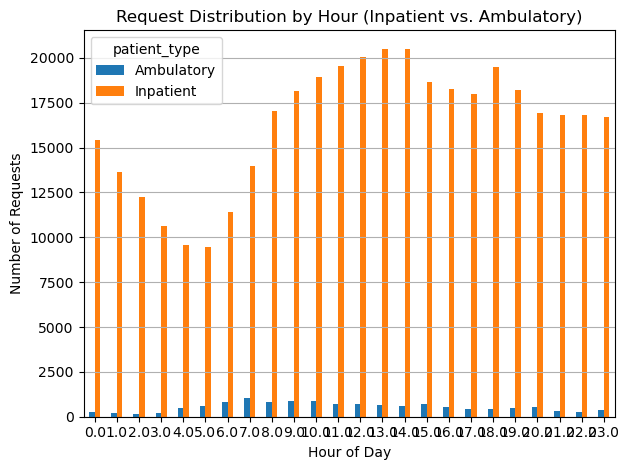

In [168]:
hourly_counts = df.groupby(['hour', 'patient_type']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')

plt.title('Request Distribution by Hour (Inpatient vs. Ambulatory)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')

plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Analysis of Request Distribution by Day of the Week (Inpatient vs. Ambulatory Comparison)

<Figure size 1000x600 with 0 Axes>

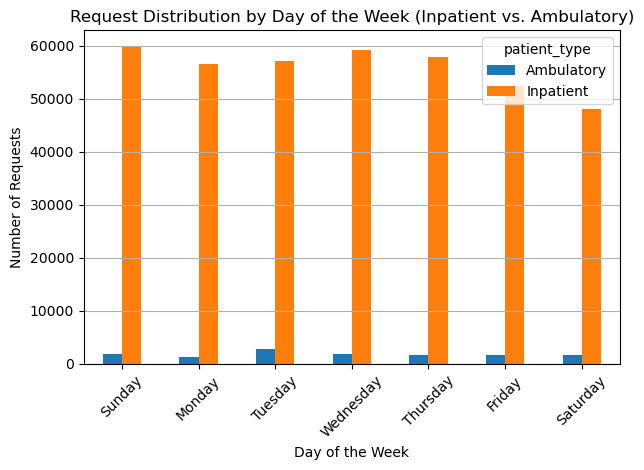

In [171]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_counts = df.groupby(['weekday', 'patient_type']).size().unstack().reindex(weekday_order).fillna(0)

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')

plt.title('Request Distribution by Day of the Week (Inpatient vs. Ambulatory)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Requests')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Heatmap: Requests by Day and Hour

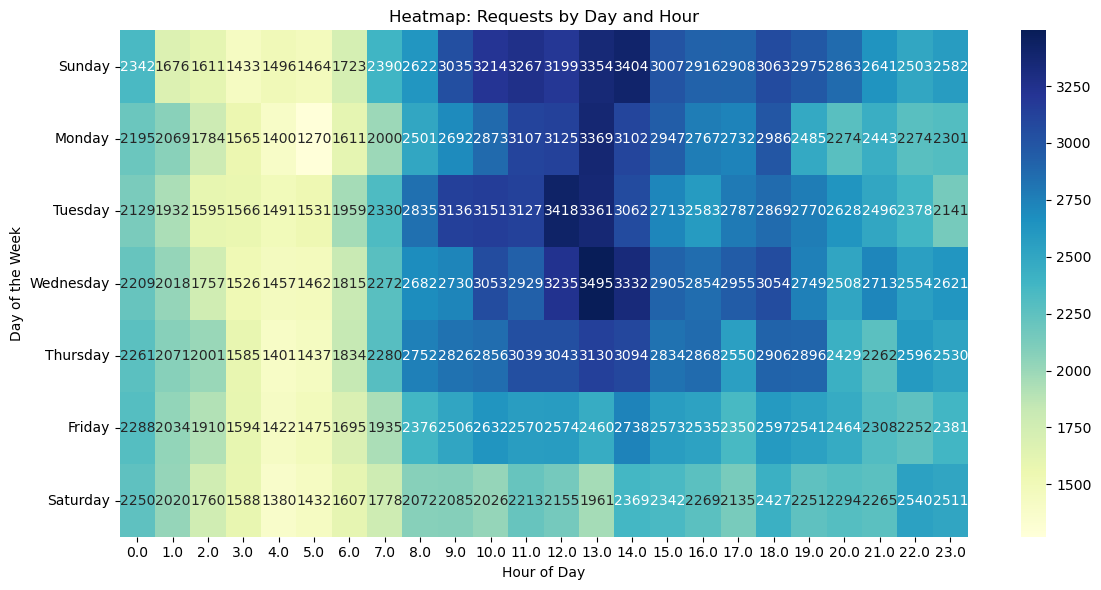

In [174]:
heatmap_data = df.groupby(['weekday', 'hour']).size().unstack().reindex(weekday_order).fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")

plt.title('Heatmap: Requests by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

Most Common Requests per Department

In [177]:
top_depts = df['department'].value_counts().head(5).index
top_reqs_by_dept = df[df['department'].isin(top_depts)]
top_reqs = top_reqs_by_dept.groupby(['department', 'requirement']).size().groupby(level=0).nlargest(5)
print("\n\033[1mTop 5 Requirements for Top 5 Departments:\033[0m")
print(top_reqs)


Top 5 Requirements for Top 5 Departments:
department     department     requirement 
A              A              בדיקת דם        53606
                              בדיקת רופא      30135
                              ניקיון تنظيف    28840
                              תפוס            26678
                              בדיקת אק"ג      20378
A מלרד אגף     A מלרד אגף     רמת דחיפות      10406
B              B              בדיקת דם        36232
                              ניקיון تنظيف    19684
                              בדיקת רופא      18404
                              תפוס            17242
                              בדיקת אק"ג      13502
C              C              בדיקת דם        26787
                              בדיקת רופא      20873
                              ניקיון تنظيف    20734
                              תפוס            18440
                              בדיקת אק"ג       9165
D מלרד מהלכים  D מלרד מהלכים  רמת דחיפות      26734
dtype: int64


Analysis of Status Distribution by Patient Type (Inpatient vs. Ambulatory)

<Figure size 1000x600 with 0 Axes>

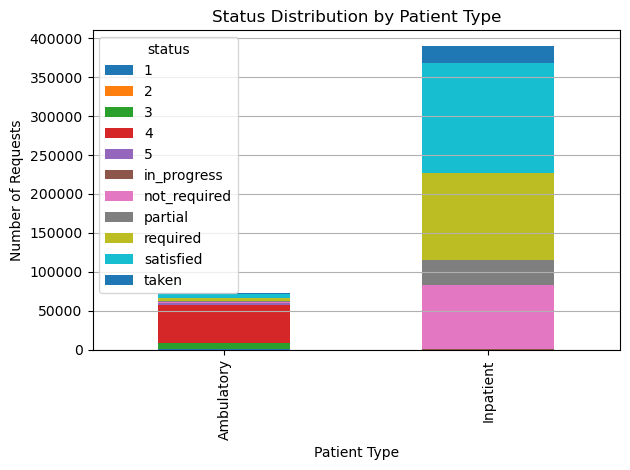

In [180]:
status_by_patient_type = df.groupby(['patient_type', 'status']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
status_by_patient_type.plot(kind='bar', stacked=True)

plt.title('Status Distribution by Patient Type')
plt.xlabel('Patient Type')
plt.ylabel('Number of Requests')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Correlation Heatmap Between Encoded Variables

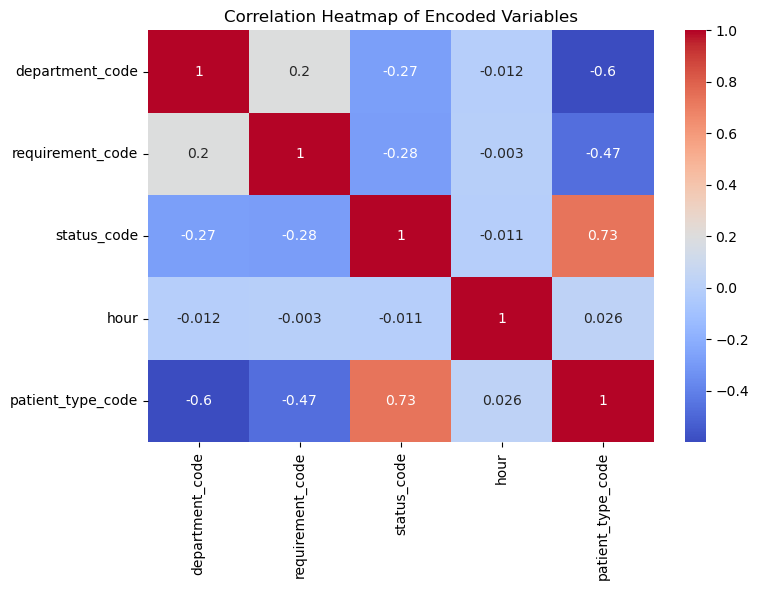

In [185]:
encoded_df = df.copy()

# Encode categorical variables as numeric codes
encoded_df['department_code'] = encoded_df['department'].astype('category').cat.codes
encoded_df['requirement_code'] = encoded_df['requirement'].astype('category').cat.codes
encoded_df['status_code'] = encoded_df['status'].astype('category').cat.codes
encoded_df['patient_type_code'] = encoded_df['patient_type'].map({'Inpatient': 1, 'Ambulatory': 0})

# Select relevant columns for correlation analysis
correlation_data = encoded_df[['department_code', 'requirement_code', 'status_code', 'hour', 'patient_type_code']]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of Encoded Variables')
plt.tight_layout()
plt.show()

Heatmap Analysis: Request Load by Requirement Type and Hour of Day

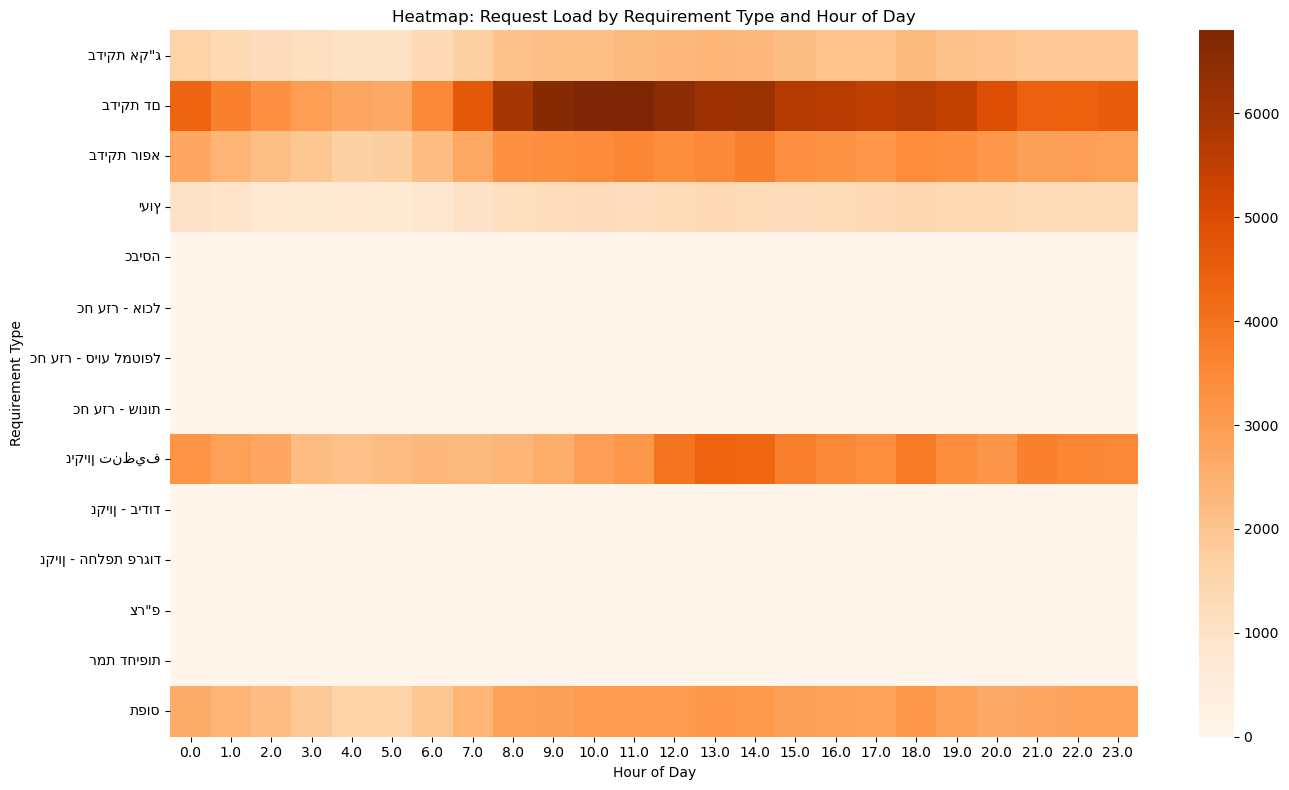

In [188]:
task_hour_data = df.groupby(['requirement', 'hour']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(task_hour_data, cmap="Oranges", annot=False)

plt.title('Heatmap: Request Load by Requirement Type and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Requirement Type')

plt.tight_layout()
plt.show()

Request Load by Requirement Type and Day of the Week

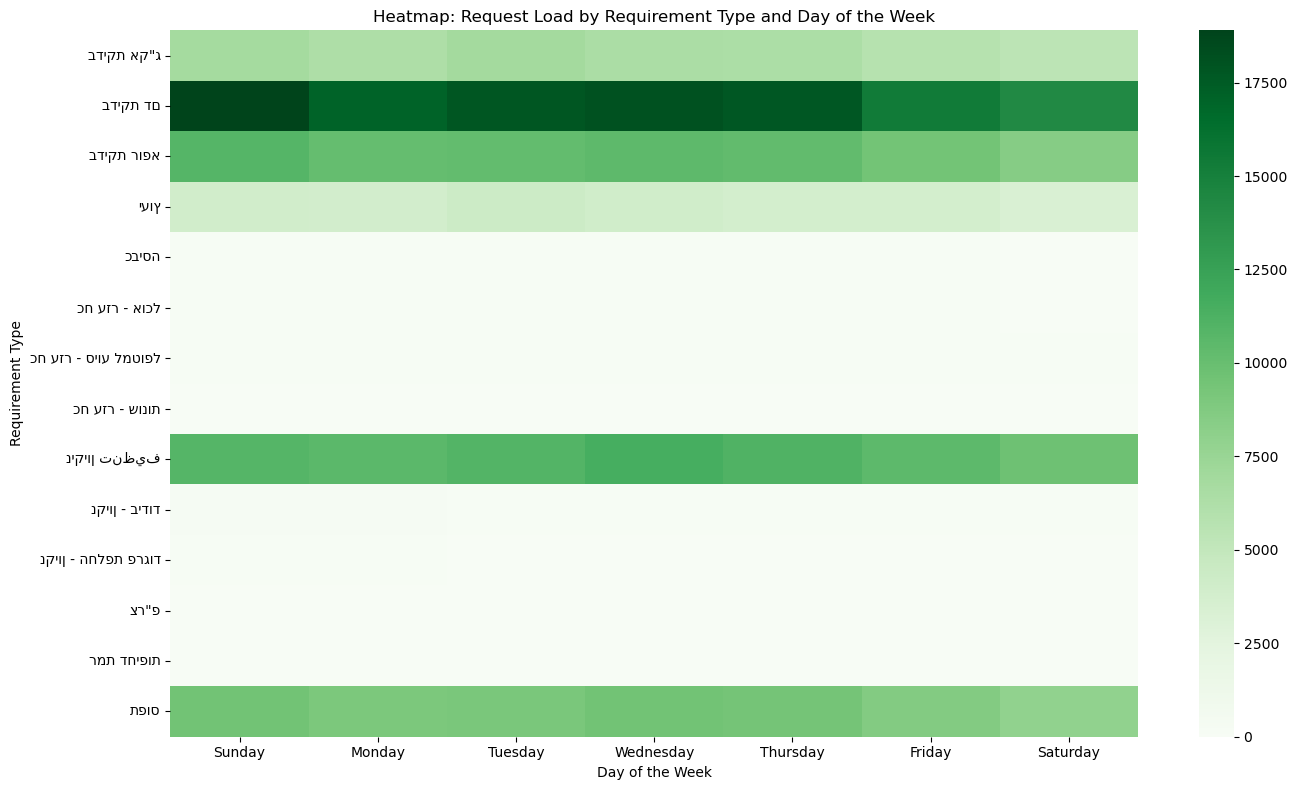

In [191]:
task_day_data = df.groupby(['requirement', 'weekday']).size().unstack().reindex(columns=weekday_order).fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(task_day_data, cmap="Greens", annot=False)

plt.title('Heatmap: Request Load by Requirement Type and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Requirement Type')

plt.tight_layout()
plt.show()

Staffing Recommendation Table by Patient Type, Requirement Type, Peak Days and Hours

In [194]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ED_full_data.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

# Classify as Inpatient or Ambulatory
inpatient_departments = ['A', 'B', 'C', 'Trauma']
df['patient_type'] = df['department'].apply(
    lambda d: 'Inpatient' if str(d).strip() in inpatient_departments else 'Ambulatory'
)

# Define the top 9 most common requirements
top_requirements = df['requirement'].value_counts().head(9).index

# Create staffing recommendations table based on patient type
recommendations = []

for patient_type in ['Inpatient', 'Ambulatory']:
    for req in top_requirements:
        temp = df[(df['requirement'] == req) & (df['patient_type'] == patient_type)]
        grouped = temp.groupby(['weekday', 'hour']).size().reset_index(name='count')
        top_hours = grouped.sort_values(by='count', ascending=False).head(3)
        for _, row in top_hours.iterrows():
            recommendations.append({
                'Patient Type': patient_type,
                'Requirement Type': req,
                'Day': row['weekday'],
                'Hour': int(row['hour']),
                'Request Count': int(row['count'])
            })

# Display the final recommendations table
recommendations_df = pd.DataFrame(recommendations)
recommendations_df

Patient Type      Requirement Type        Day  Hour  Request Count
0     Inpatient              בדיקת דם     Sunday    11           1101
1     Inpatient              בדיקת דם     Sunday    10           1089
2     Inpatient              בדיקת דם    Tuesday    10           1086
3     Inpatient          ניקיון تنظيف  Wednesday    13            720
4     Inpatient          ניקיון تنظيف    Tuesday    13            664
5     Inpatient          ניקיון تنظيف     Monday    13            637
6     Inpatient            בדיקת רופא     Sunday    14            598
7     Inpatient            בדיקת רופא     Sunday     9            591
8     Inpatient            בדיקת רופא     Monday    14            570
9     Inpatient                  תפוס  Wednesday    13            522
10    Inpatient                  תפוס    Tuesday    13            506
11    Inpatient                  תפוס     Sunday    14            503
12    Inpatient            בדיקת אק"ג     Sunday    13            387
13    Inpatient            בדיקת אק"ג     Monday    13            385
14    Inpatient            בדיקת אק"ג     Sunday    14            382
15    Inpatient                  יעוץ     Sunday    20            244
16    Inpatient                  יעוץ  Wednesday    18            239
17    Inpatient                  יעוץ  Wednesday    17            237
18    Inpatient         נקיון - בידוד     Sunday     7             40
19    Inpatient         נקיון - בידוד     Monday    16             25
20    Inpatient         נקיון - בידוד     Monday    13             23
21    Inpatient  כח עזר - סיוע למטופל     Monday     9             21
22    Inpatient  כח עזר - סיוע למטופל     Sunday    10             19
23    Inpatient  כח עזר - סיוע למטופל    Tuesday    11             15
24   Ambulatory              בדיקת דם   Saturday     7            102
25   Ambulatory              בדיקת דם   Saturday    10            101
26   Ambulatory              בדיקת דם   Saturday     8             98
27   Ambulatory          ניקיון تنظيف    Tuesday    11             92
28   Ambulatory          ניקיון تنظيف     Sunday    10             91
29   Ambulatory          ניקיון تنظيف  Wednesday    12             82
30   Ambulatory            בדיקת רופא     Sunday     9             42
31   Ambulatory            בדיקת רופא     Sunday    11             13
32   Ambulatory            בדיקת רופא     Sunday    10             13
33   Ambulatory                  תפוס  Wednesday     6             17
34   Ambulatory                  תפוס   Saturday     9             15
35   Ambulatory                  תפוס    Tuesday    12             15
36   Ambulatory            רמת דחיפות  Wednesday     8              2
37   Ambulatory            בדיקת אק"ג    Tuesday     7             93
38   Ambulatory            בדיקת אק"ג    Tuesday     6             92
39   Ambulatory            בדיקת אק"ג   Saturday     7             92
40   Ambulatory                  יעוץ    Tuesday     7             91
41   Ambulatory                  יעוץ    Tuesday     8             89
42   Ambulatory                  יעוץ    Tuesday     5             88
43   Ambulatory         נקיון - בידוד     Sunday     7             13
44   Ambulatory         נקיון - בידוד  Wednesday    13              6
45   Ambulatory         נקיון - בידוד     Friday    16              5
46   Ambulatory  כח עזר - סיוע למטופל   Thursday    15              7
47   Ambulatory  כח עזר - סיוע למטופל     Sunday     9              7
48   Ambulatory  כח עזר - סיוע למטופל  Wednesday    15              6

Heatmap – Request Load by Hour and Requirement Type, Separated by Patient Type (Inpatient / Ambulatory)

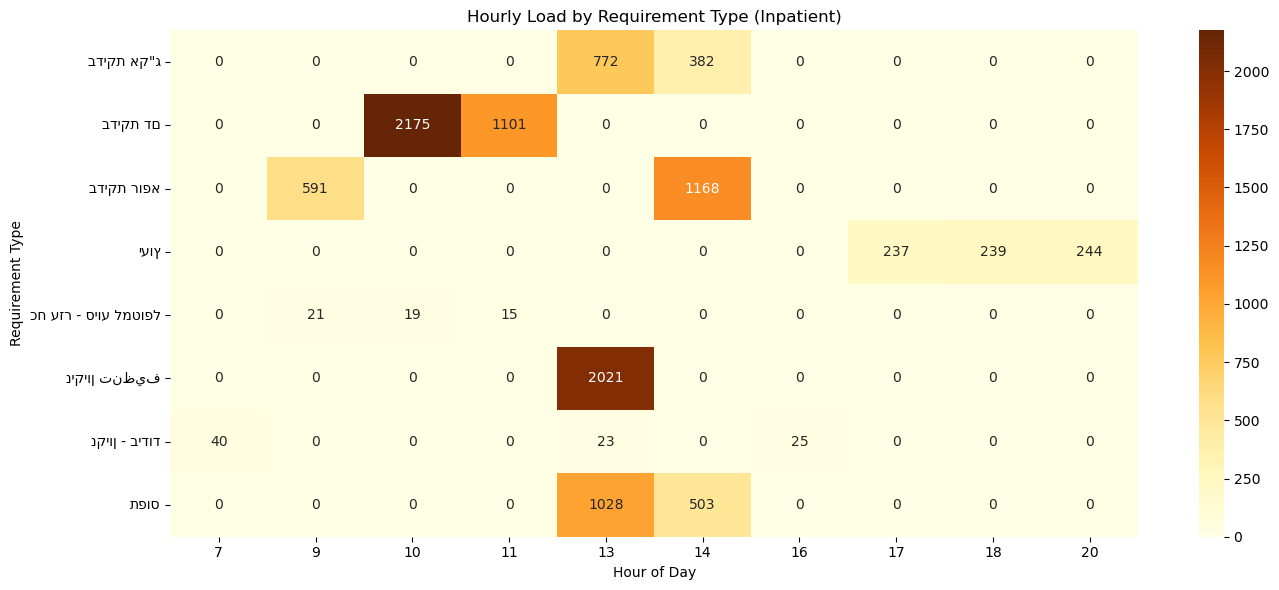

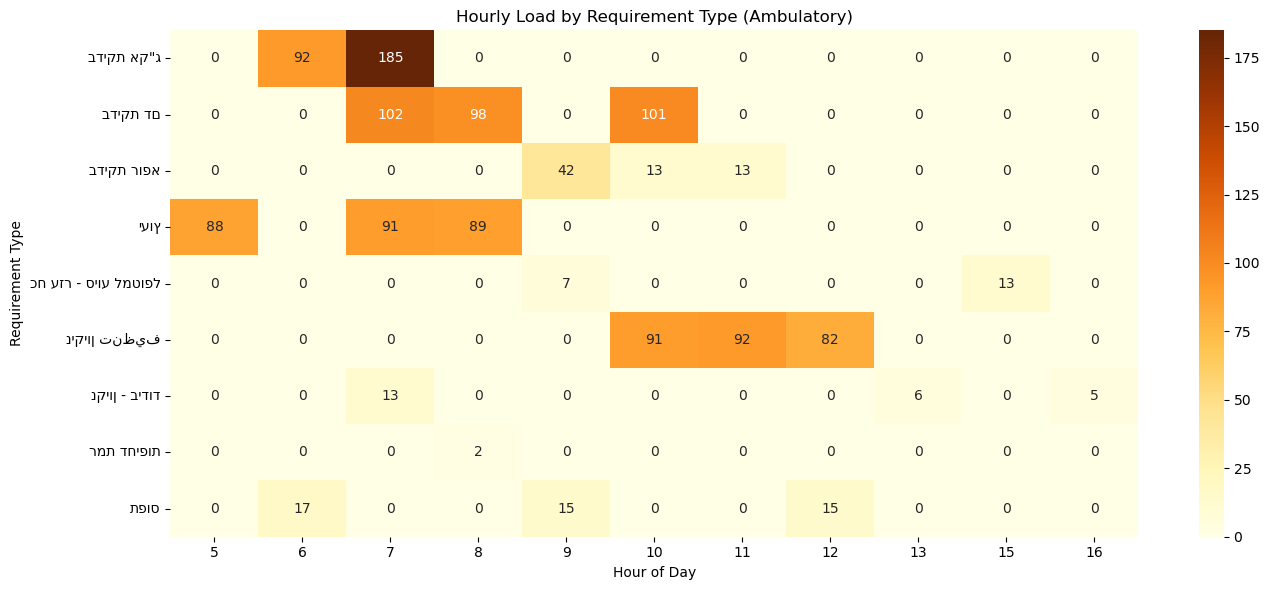

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns are strings to avoid display issues
recommendations_df['Day'] = recommendations_df['Day'].astype(str)
recommendations_df['Requirement Type'] = recommendations_df['Requirement Type'].astype(str)

# Plot heatmap of request counts by requirement type and hour, split by patient type
for patient_type in ['Inpatient', 'Ambulatory']:
    subset = recommendations_df[recommendations_df['Patient Type'] == patient_type]
    pivot_table = subset.pivot_table(index='Requirement Type', columns='Hour', values='Request Count', aggfunc='sum').fillna(0)

    plt.figure(figsize=(14, 6))
    sns.heatmap(pivot_table, cmap="YlOrBr", annot=True, fmt=".0f")
    plt.title(f'Hourly Load by Requirement Type ({patient_type})')
    plt.xlabel('Hour of Day')
    plt.ylabel('Requirement Type')
    plt.tight_layout()
    plt.show()

Heatmaps of the 9 Most Common Requirements – Load by Day and Hour

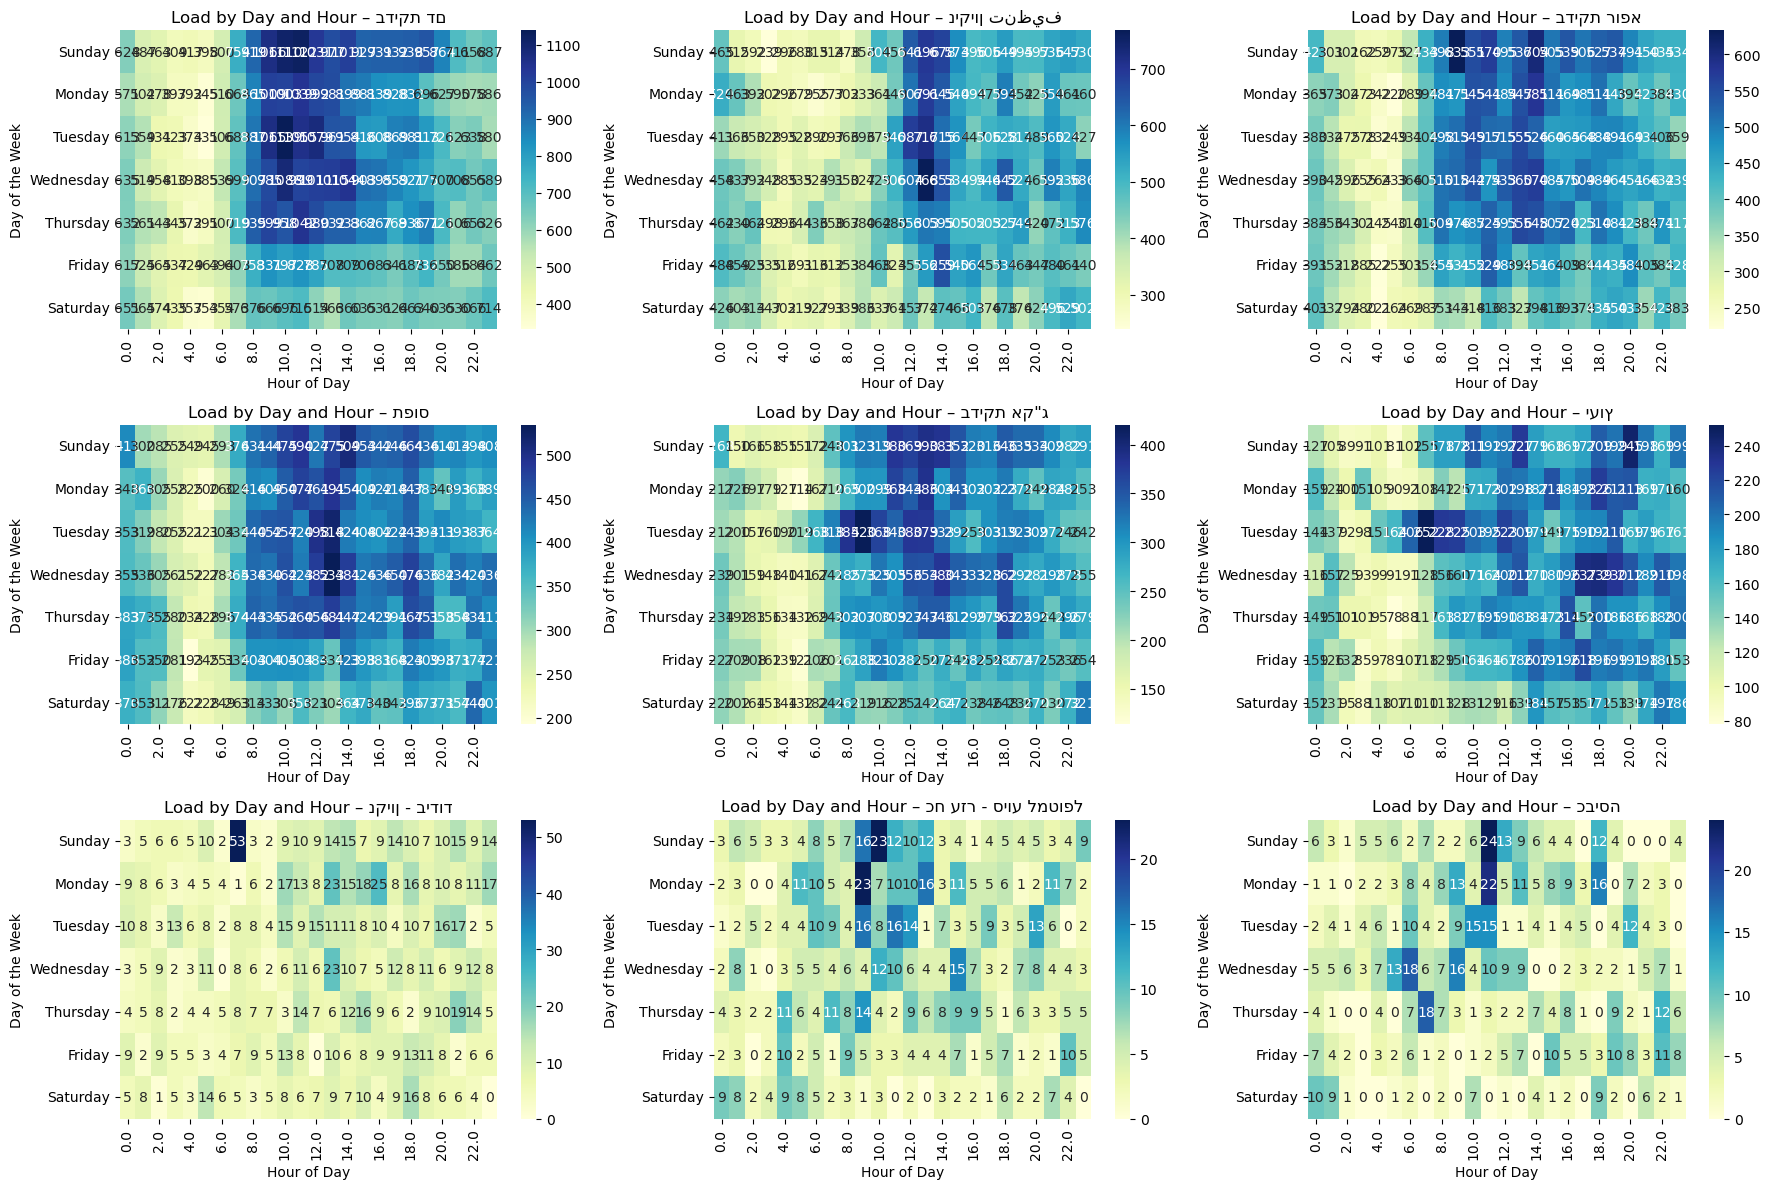

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure required columns exist
if 'timestamp' in df.columns and 'requirement' in df.columns:
    # Parse timestamp and extract hour and weekday
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['hour'] = df['timestamp'].dt.hour
    df['weekday'] = df['timestamp'].dt.day_name()

    # Define fixed weekday order
    weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

    # Drop rows with missing values in key columns
    df = df.dropna(subset=['hour', 'weekday', 'requirement'])

    # Get the 9 most common requirements
    top_requirements = df['requirement'].value_counts().head(9).index

    # Create heatmaps
    fig, axs = plt.subplots(3, 3, figsize=(18, 12))
    axs = axs.flatten()

    for i, req in enumerate(top_requirements):
        # Filter data by current requirement
        task_data = df[df['requirement'] == req]
        pivot = task_data.groupby(['weekday', 'hour']).size().unstack().reindex(index=weekday_order).fillna(0)

        sns.heatmap(pivot, ax=axs[i], cmap="YlGnBu", annot=True, fmt=".0f")
        axs[i].set_title(f'Load by Day and Hour – {req}')
        axs[i].set_xlabel('Hour of Day')
        axs[i].set_ylabel('Day of the Week')

    plt.tight_layout()
    plt.show()

else:
    print("Missing required columns: 'timestamp' or 'requirement'.")

Analysis of Load Patterns by Requirement Type, Day, and Hour in the Hospital

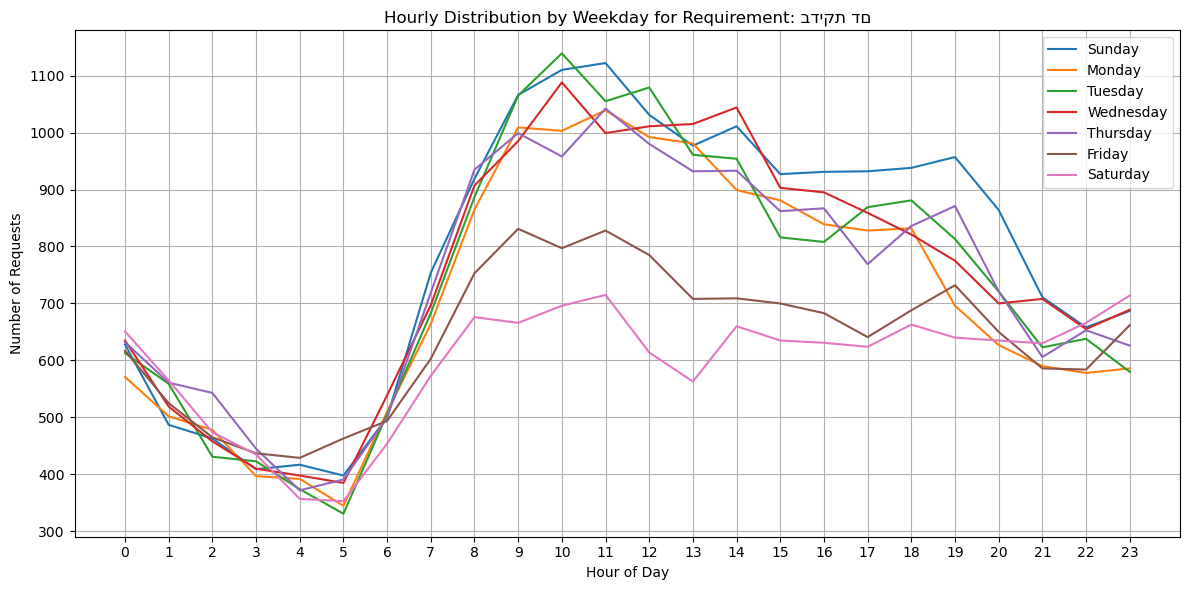

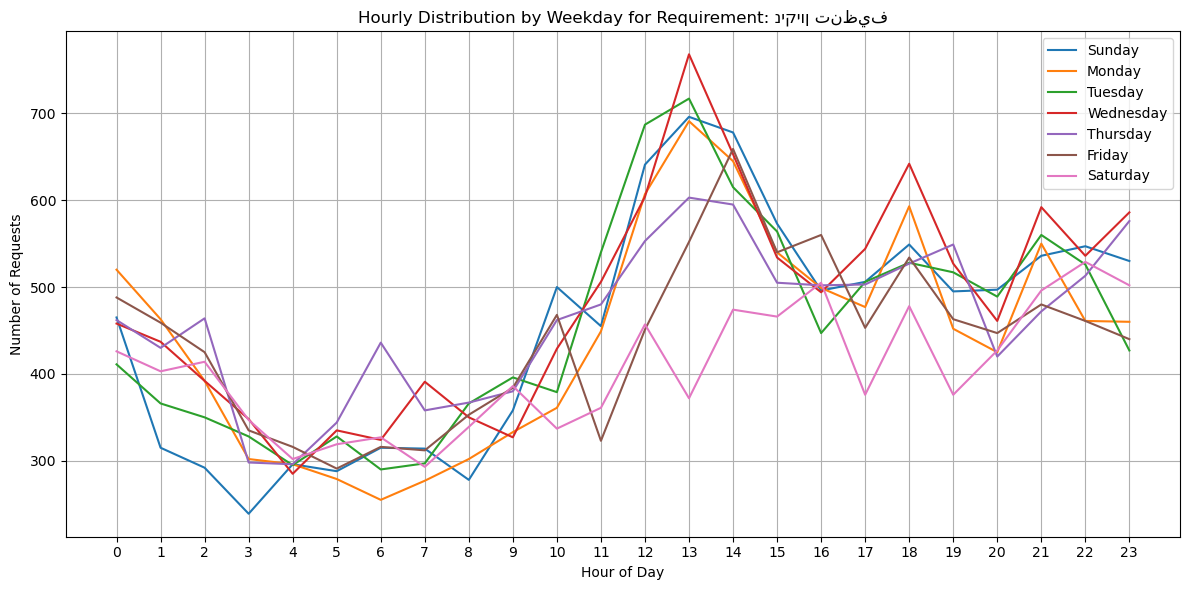

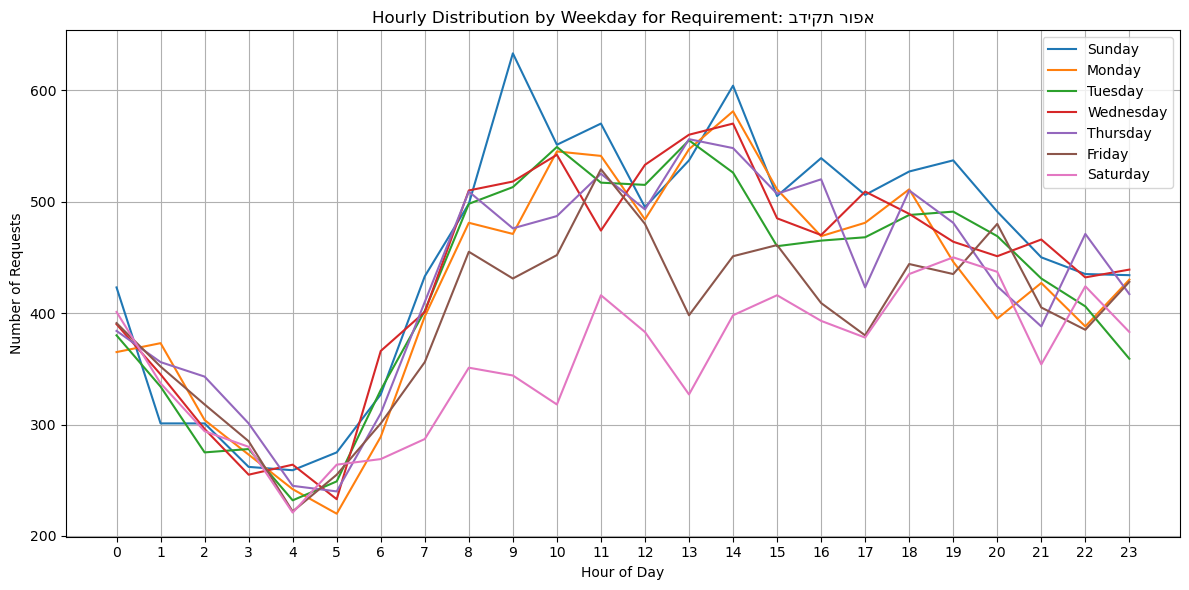

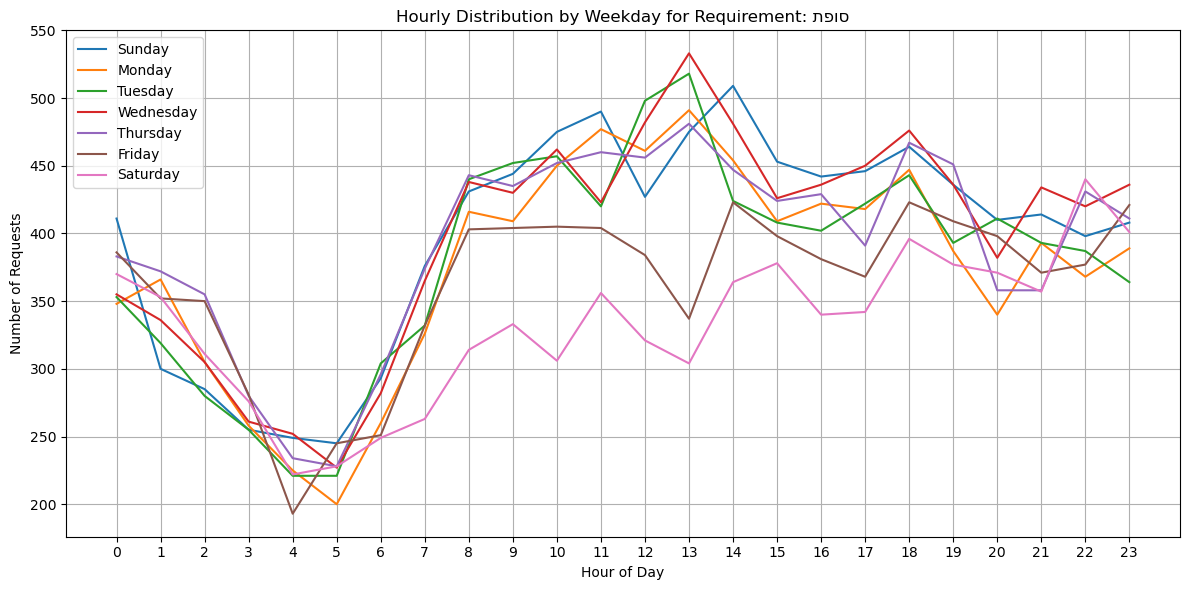

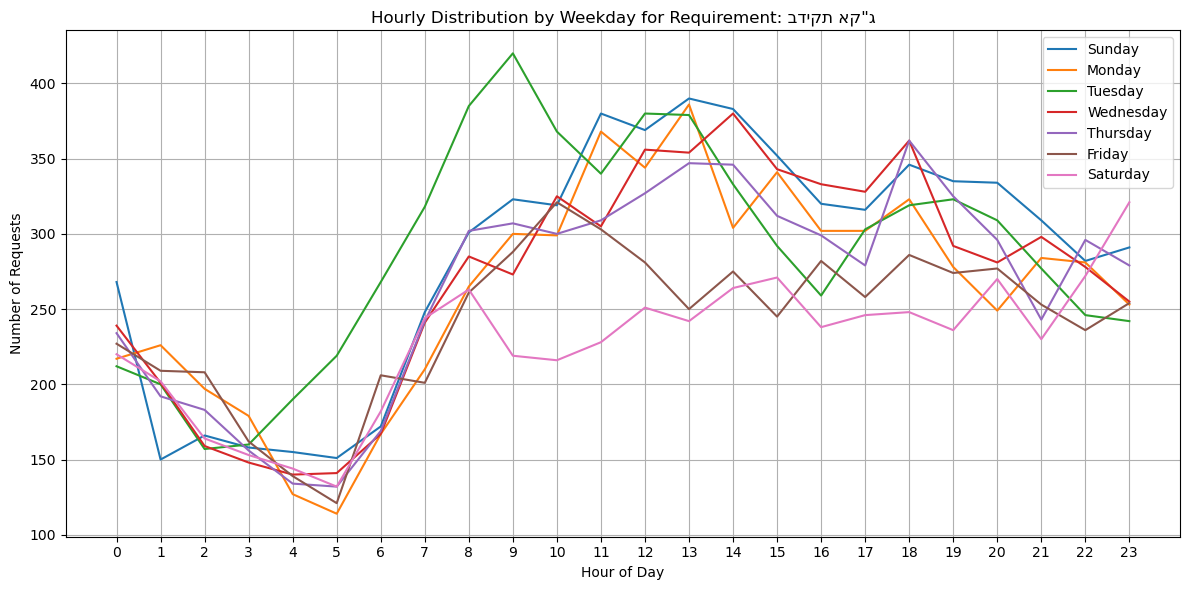

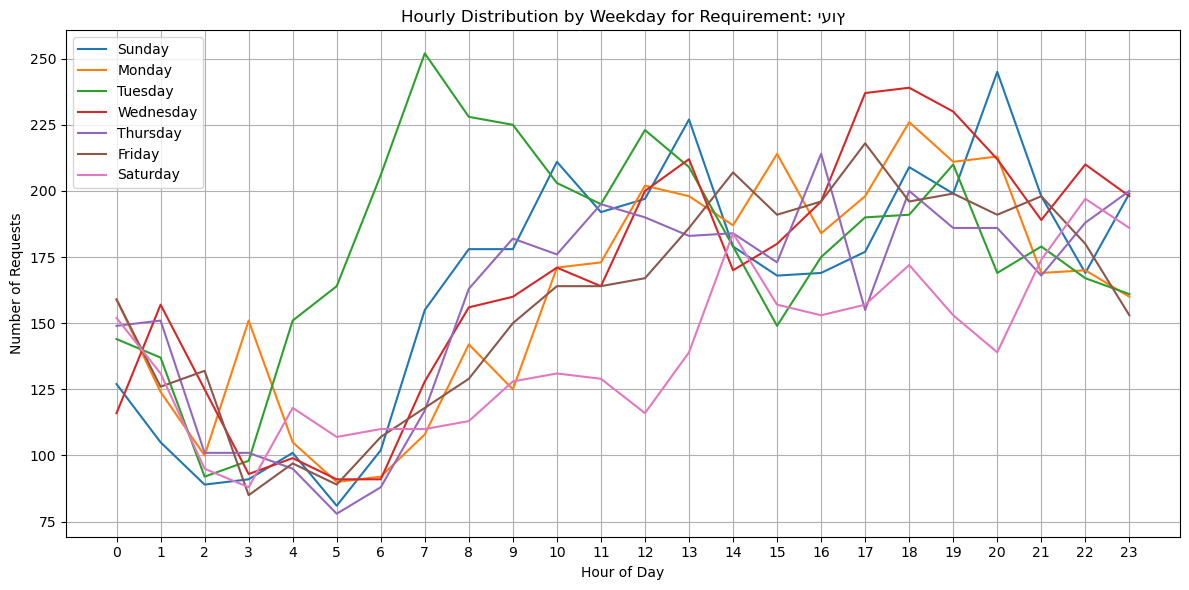

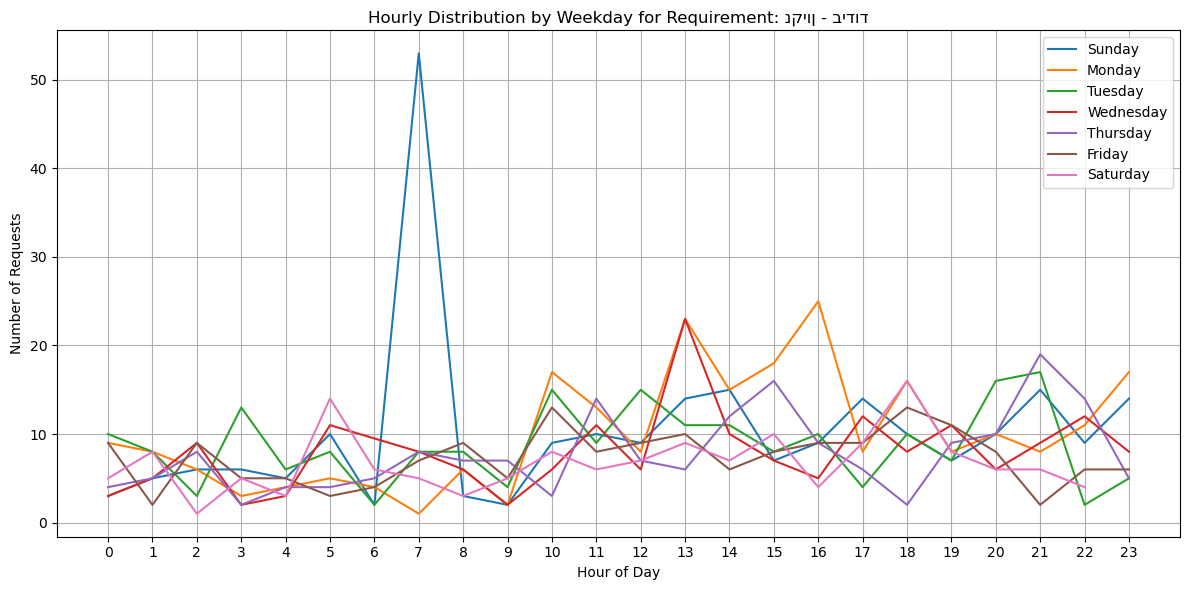

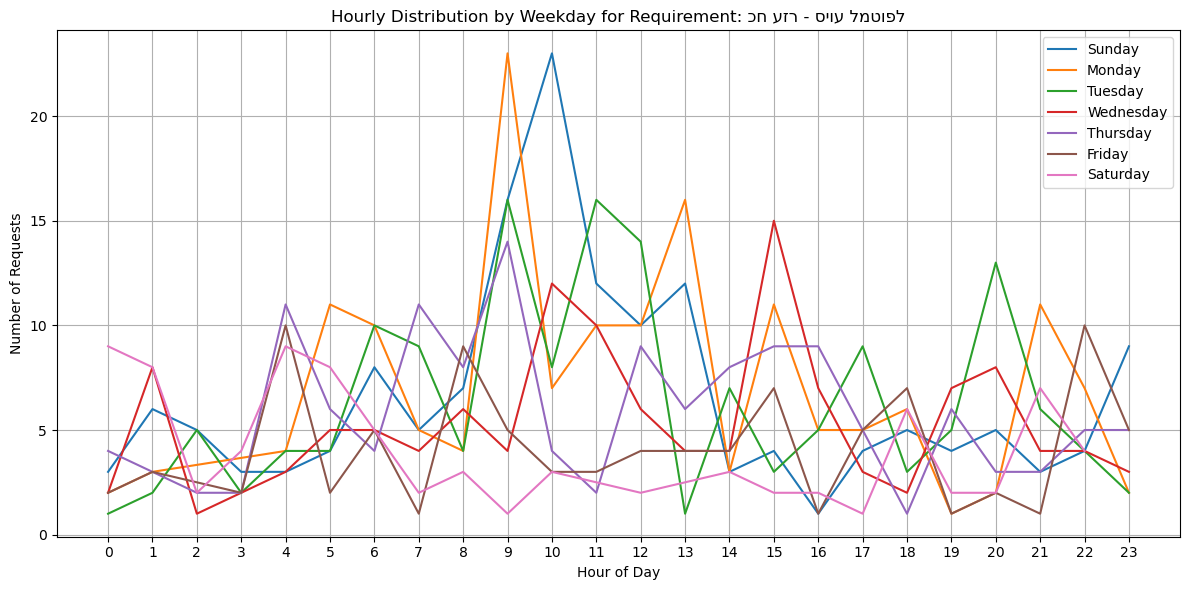

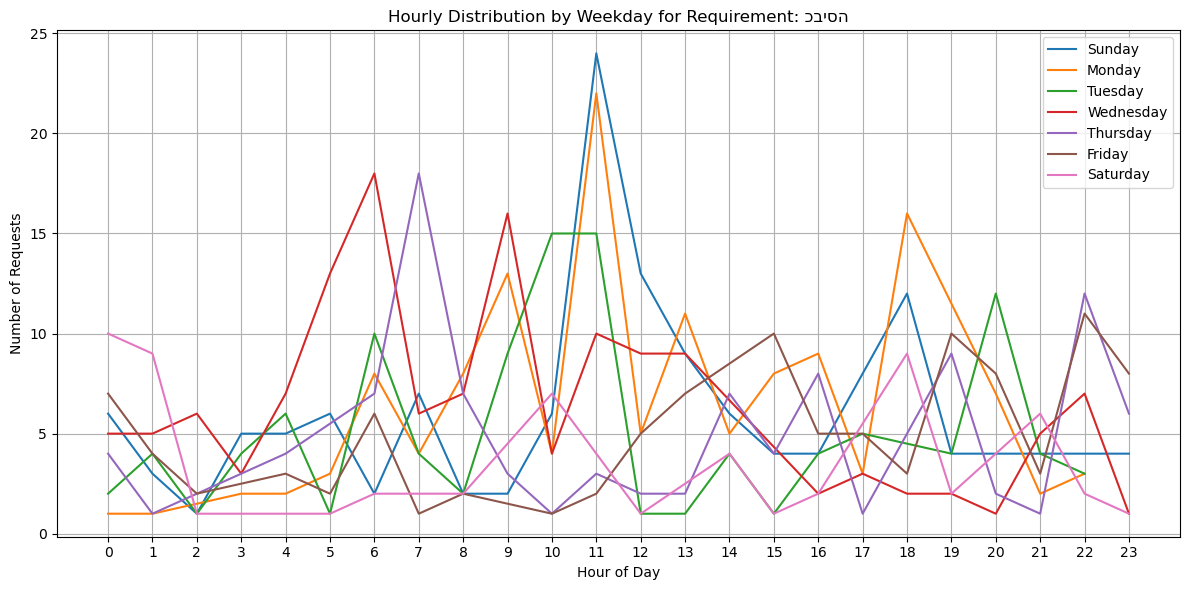

In [203]:
import matplotlib.pyplot as plt

# Prepare time-related columns
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

# Identify the 9 most common requirements
top_requirements = df['requirement'].value_counts().head(9).index
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot a line graph for each requirement
# X-axis: hour of day | Lines: different weekdays
for req in top_requirements:
    plt.figure(figsize=(12, 6))
    for day in weekday_order:
        subset = df[(df['requirement'] == req) & (df['weekday'] == day)]
        hourly_counts = subset.groupby('hour').size()
        plt.plot(hourly_counts.index, hourly_counts.values, label=day)

    plt.title(f'Hourly Distribution by Weekday for Requirement: {req}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Requests')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Comparing Hourly Demand: Inpatients vs. Ambulatory – Top Task Types

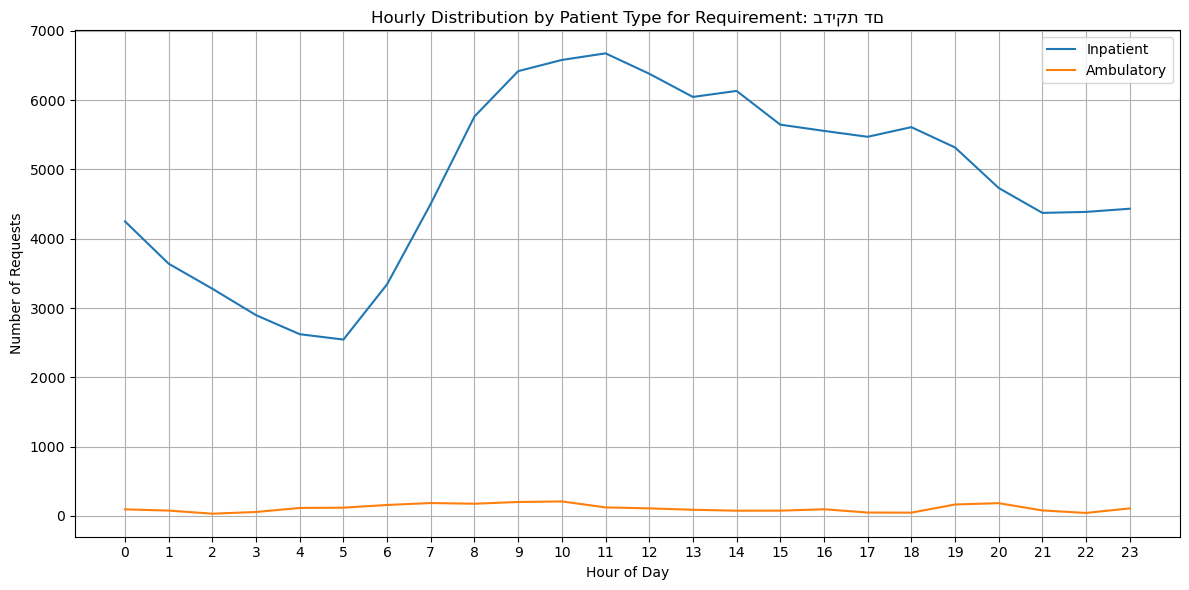

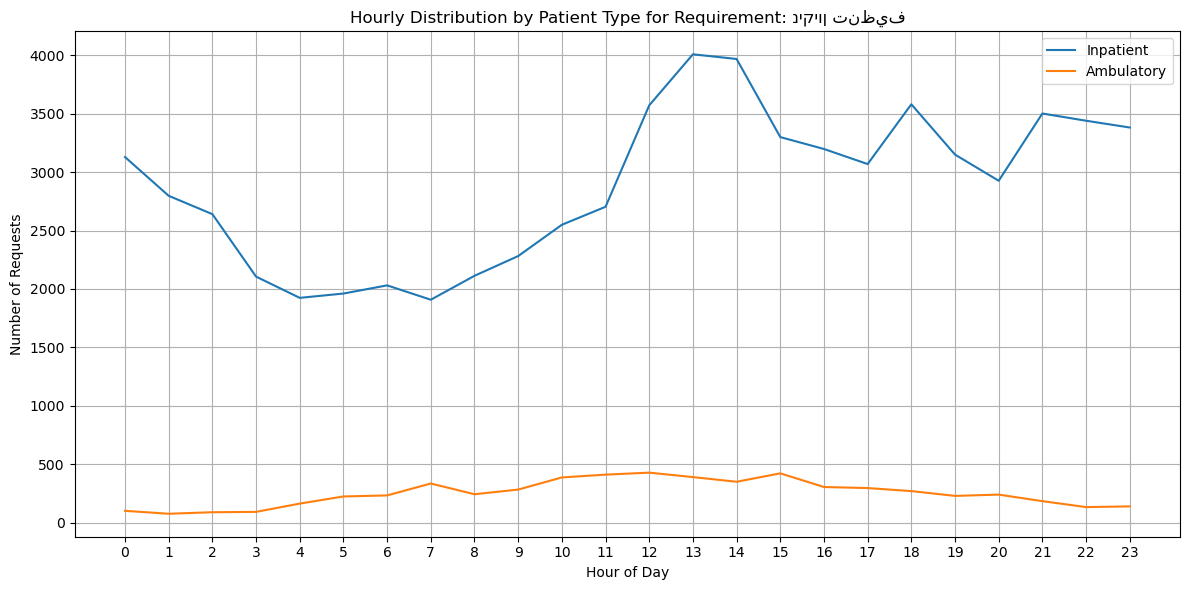

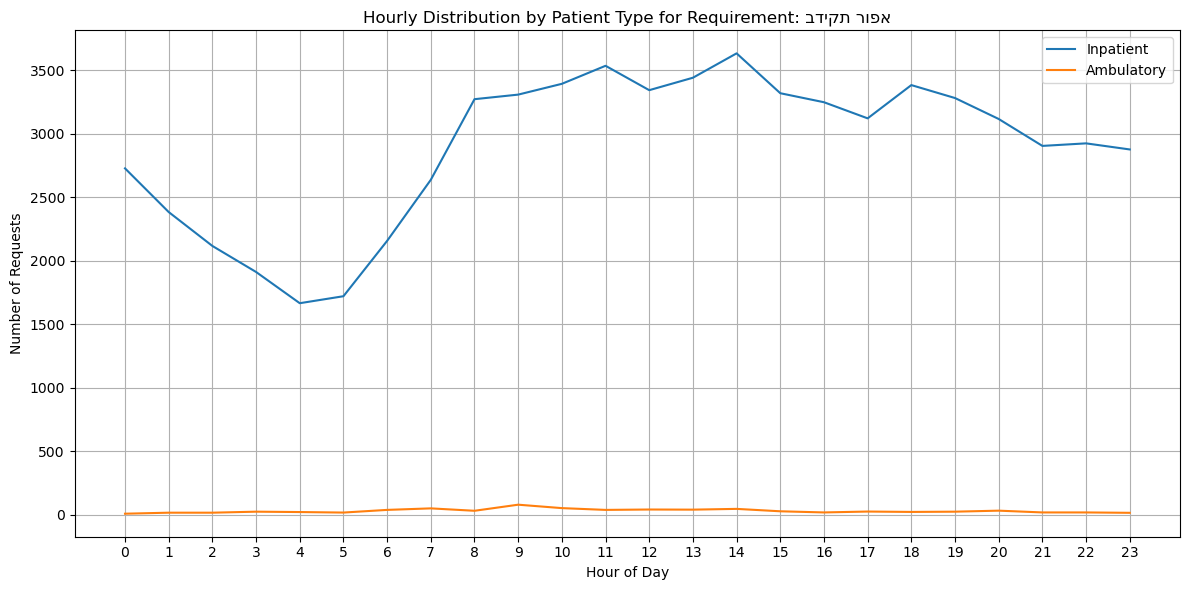

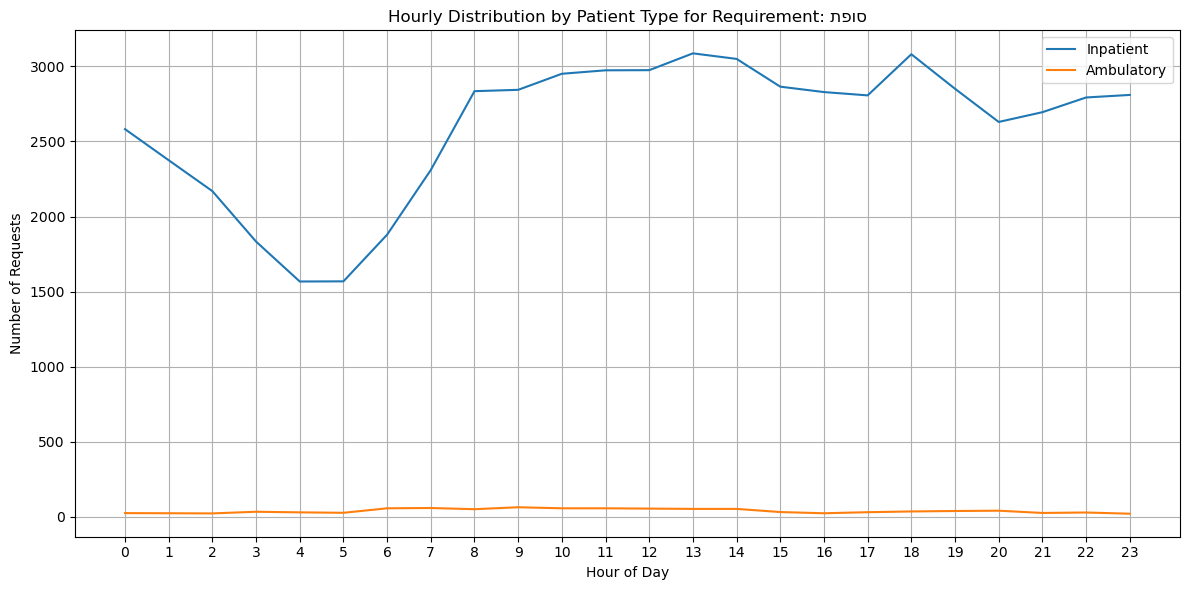

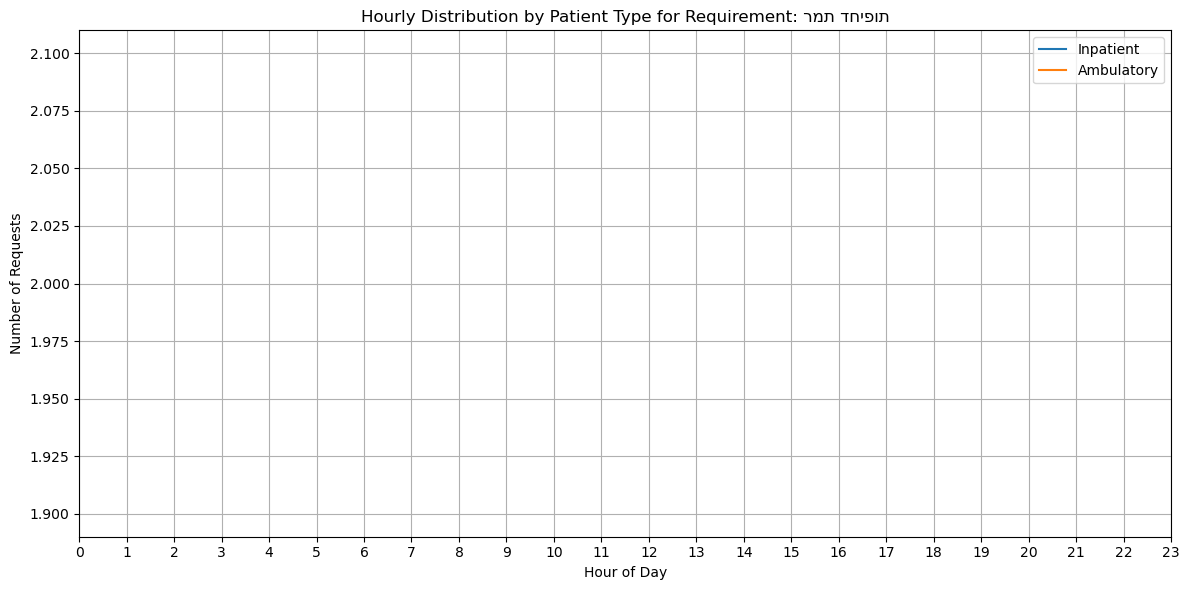

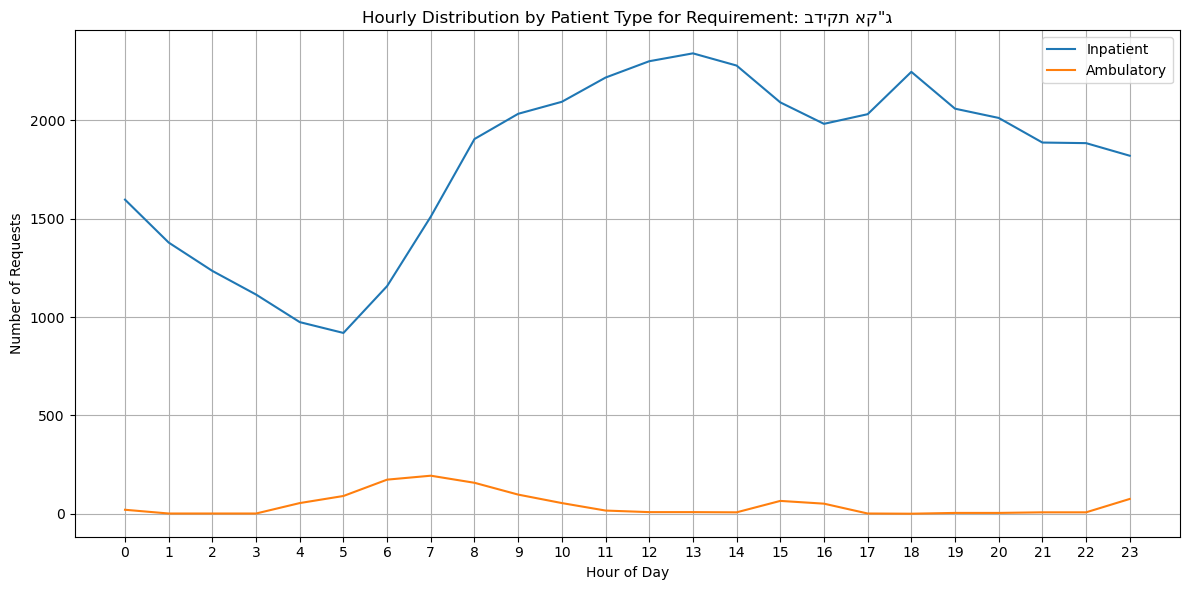

In [263]:
import matplotlib.pyplot as plt

# Ensure necessary columns exist
df['hour'] = df['timestamp'].dt.hour

# Define inpatient and ambulatory classifications
inpatient_departments = ['A', 'B', 'C', 'Trauma']
df['patient_type'] = df['department'].apply(lambda d: 'Inpatient' if str(d).strip() in inpatient_departments else 'Ambulatory')

# Get the top 9 most common requirements
top_requirements = df['requirement'].value_counts().head(9).index

# Plot hourly distribution for each top requirement
for req in top_requirements:
    plt.figure(figsize=(12, 6))
    
    for patient_type in ['Inpatient', 'Ambulatory']:
        subset = df[(df['requirement'] == req) & (df['patient_type'] == patient_type)]
        hourly_counts = subset.groupby('hour').size()
        plt.plot(hourly_counts.index, hourly_counts.values, label=patient_type)

    plt.title(f'Hourly Distribution by Patient Type for Requirement: {req}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Requests')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Success Rate by Requirement and Department

In [209]:
success_by_req_dept = df.groupby(['requirement', 'department'])['status'].value_counts(normalize=True).unstack().fillna(0)
print("\n\033[1mSuccess Rate by Requirement and Department:\033[0m")
print(success_by_req_dept[['satisfied']].sort_values('satisfied', ascending=False))


Success Rate by Requirement and Department:
status                                 satisfied
requirement   department                        
צר"פ          טראומה חדש                0.750000
נקיון - בידוד מלר"ד אגף מהלכים          0.602941
כח עזר - אוכל טראומה חדש                0.600000
צר"פ          A                         0.591837
כביסה         טראומה חדש                0.571429
...                                          ...
יעוץ          מלר"ד אגף מהלכים          0.097800
בדיקת רופא    טריאז' מיון חדש           0.000000
רמת דחיפות    מיון כירורגיה - מ.הלכים   0.000000
              מיון פנימי                0.000000
בדיקת רופא    דימות                     0.000000

[78 rows x 1 columns]


Count of 'not_required' and 'partial' statuses per department

In [212]:
status_focus = df[df['status'].isin(['not_required', 'partial'])]
status_problem_counts = status_focus.groupby(['department', 'status']).size().unstack().fillna(0)
print("\n\033[1mDepartments with High 'not_required' or 'partial' Counts:\033[0m")
print(status_problem_counts.sort_values(['partial', 'not_required'], ascending=False))


Departments with High 'not_required' or 'partial' Counts:
status            not_required  partial
department                             
A                      36908.0  14676.0
B                      23818.0   9961.0
C                      21771.0   7485.0
מלר"ד אגף מהלכים        1841.0    405.0
טראומה חדש               324.0    250.0
טריאז' מיון חדש            5.0      0.0
דימות                      4.0      0.0


 ניתוח חדרים עם מספר הבקשות הגבוה ביותר

In [215]:
top_rooms = df['room'].value_counts().head(10)
print("\n\033[1mTop Rooms by Number of Requests:\033[0m")
print(top_rooms)


Top Rooms by Number of Requests:
room
A103    11379
A104    11234
A115    11018
A114    10990
A113    10638
A105    10584
A112    10466
A116    10293
A102     9994
A110     9970
Name: count, dtype: int64


Request Volume Analysis: Weekdays vs. Weekends

In [218]:
df['is_weekend'] = df['weekday'].isin(['Friday', 'Saturday'])
weekend_comparison = df.groupby(['requirement', 'is_weekend']).size().unstack().fillna(0)
weekend_comparison.columns = ['Weekday', 'Weekend']
print("\n\033[1mRequest Volume: Weekday vs Weekend:\033[0m")
print(weekend_comparison.sort_values('Weekend', ascending=False))


Request Volume: Weekday vs Weekend:
                      Weekday  Weekend
requirement                           
בדיקת דם              89658.0  29660.0
ניקיון تنظيف          55035.0  20222.0
בדיקת רופא            52041.0  18063.0
תפוס                  46616.0  16668.0
בדיקת אק"ג            32888.0  11273.0
יעוץ                  19962.0   7141.0
נקיון - בידוד          1071.0    322.0
כח עזר - סיוע למטופל    733.0    181.0
כביסה                   617.0    165.0
כח עזר - אוכל           632.0    133.0
נקיון - החלפת פרגוד     290.0     80.0
כח עזר - שונות          235.0     19.0
צר"פ                    134.0     13.0
רמת דחיפות                2.0      0.0


Analysis of Repeated Requests by Room and Requirement Type

In [222]:
repeated_requests = df.groupby(['room', 'requirement']).size().reset_index(name='count')
repeated_requests_filtered = repeated_requests[repeated_requests['count'] > 20].sort_values('count', ascending=False)
print("\n\033[1mRepeated Requests (Room + Requirement) > 20 Times:\033[0m")
print(repeated_requests_filtered)


Repeated Requests (Room + Requirement) > 20 Times:
      room          requirement  count
116   A103             בדיקת דם   3588
129   A104             בדיקת דם   3561
264   A115             בדיקת דם   3492
252   A114             בדיקת דם   3455
139   A105             בדיקת דם   3367
..     ...                  ...    ...
218   A111        כח עזר - אוכל     22
36     418           בדיקת רופא     21
805  א.ק.ג  נקיון - החלפת פרגוד     21
94    A101        כח עזר - אוכל     21
294   A117        כח עזר - אוכל     21

[467 rows x 3 columns]


Departments with a High Rate of 'Partial' or 'Not Required' Status

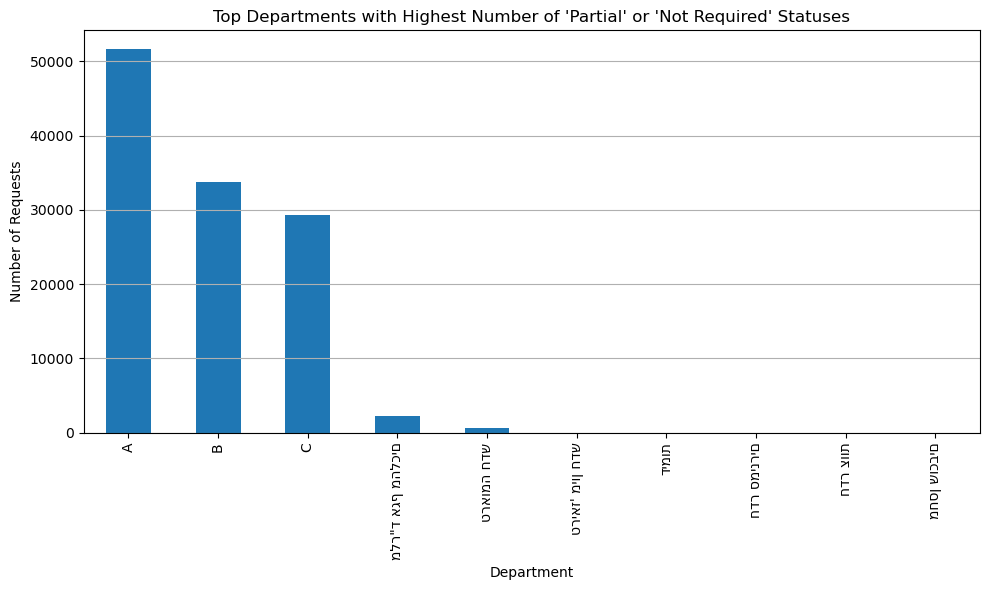

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a table that counts statuses per department
status_problem_counts = df.pivot_table(index='department', columns='status', aggfunc='size', fill_value=0)

# Plot departments with the highest number of 'partial' or 'not_required' statuses
plt.figure(figsize=(10, 6))
status_problem_counts[['partial', 'not_required']].sum(axis=1).sort_values(ascending=False).head(10).plot(kind='bar')

plt.title("Top Departments with Highest Number of 'Partial' or 'Not Required' Statuses")
plt.ylabel('Number of Requests')
plt.xlabel('Department')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Daily Load Prediction Model Using XGBoost

In [228]:
!python -m pip install --upgrade pip
!pip install xgboost

MSE: 360.15
R² score: 0.91


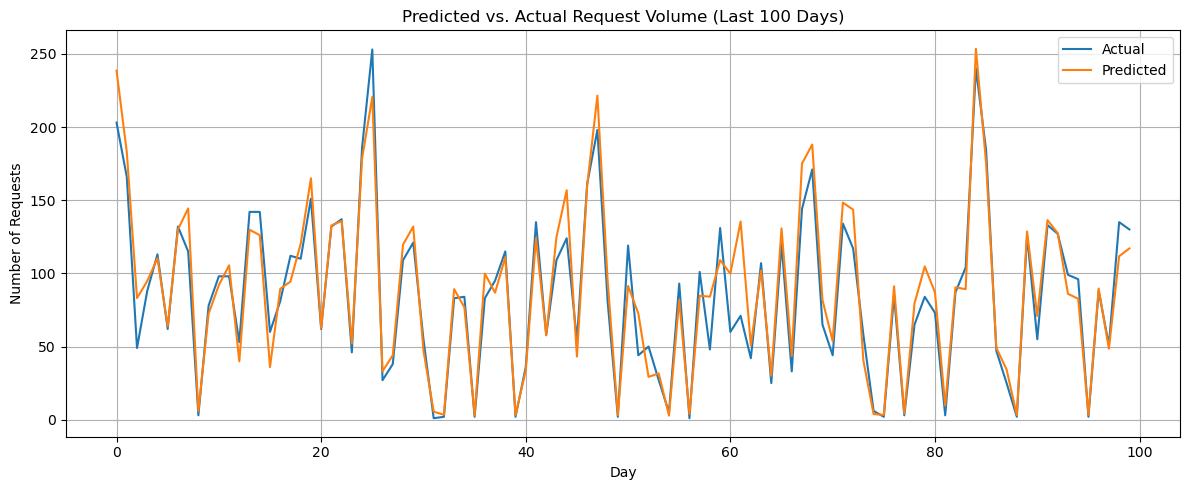

In [230]:
# Step 1: Import Libraries and Prepare Data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ED_full_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date
df['weekday'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Friday', 'Saturday'])

# Step 2: Group by date, department, requirement
daily = df.groupby(['date', 'department', 'requirement', 'weekday', 'is_weekend']).size().reset_index(name='request_count')
daily = daily.sort_values('date')

# Encode categorical variables
le_dept = LabelEncoder()
le_req = LabelEncoder()
le_day = LabelEncoder()

daily['dept_encoded'] = le_dept.fit_transform(daily['department'].astype(str))
daily['req_encoded'] = le_req.fit_transform(daily['requirement'].astype(str))
daily['day_encoded'] = le_day.fit_transform(daily['weekday'])

# Step 3: Create LAG feature (previous day's request count)
daily['lag_1'] = daily.groupby(['department', 'requirement'])['request_count'].shift(1)
daily = daily.dropna()  # Remove rows without lag data

# Step 4: Define features and target variable
X = daily[['dept_encoded', 'req_encoded', 'day_encoded', 'is_weekend', 'lag_1']]
y = daily['request_count']

# Step 5: Time-based split (first 80% for training)
split_index = int(0.8 * len(daily))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Step 6: Train model
model = XGBRegressor()
model.fit(X_train, y_train)

# Step 7: Forecast and evaluate
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² score: {r2_score(y_test, y_pred):.2f}')

# Step 8: Plot actual vs. predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Predicted vs. Actual Request Volume (Last 100 Days)')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Forecasting Request Volume 7 Days Ahead by Department and Task Type

🔹 Performance on Training Set:
MSE (Train): 403.95
R² (Train): 0.91

🔹 Performance on Test Set:
MSE (Test): 528.57
R² (Test): 0.87


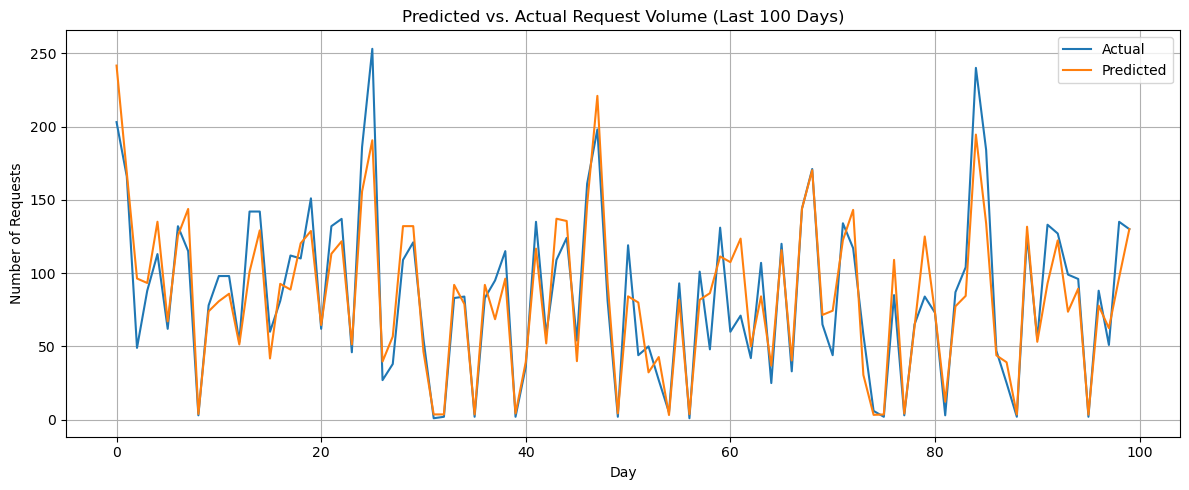

In [233]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Step 1: Load and Process Data ---
df = pd.read_csv('ED_full_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date
df['weekday'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Friday', 'Saturday'])

# --- Step 2: Daily Aggregation by Department and Requirement ---
daily = df.groupby(['date', 'department', 'requirement', 'weekday', 'is_weekend'])\
          .size().reset_index(name='request_count')
daily = daily.sort_values('date')

# Encode weekday
le_day = LabelEncoder()
daily['day_encoded'] = le_day.fit_transform(daily['weekday'])

# Create lag feature
daily['lag_1'] = daily.groupby(['department', 'requirement'])['request_count'].shift(1)
daily = daily.dropna()

# --- Step 3: Define Features and Target ---
X = daily[['day_encoded', 'is_weekend', 'lag_1']]
y = daily['request_count']

# --- Step 4: Time-based Train-Test Split ---
split_index = int(0.8 * len(daily))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- Step 5: Train Model ---
model = XGBRegressor()
model.fit(X_train, y_train)

# --- Step 6: Forecast ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Step 7: Performance Metrics ---
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("🔹 Performance on Training Set:")
print(f"MSE (Train): {mse_train:.2f}")
print(f"R² (Train): {r2_train:.2f}\n")

print("🔹 Performance on Test Set:")
print(f"MSE (Test): {mse_test:.2f}")
print(f"R² (Test): {r2_test:.2f}")

# --- Step 8: Plot Actual vs. Predicted ---
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_test_pred[:100], label='Predicted')
plt.title('Predicted vs. Actual Request Volume (Last 100 Days)')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Overfitting Check – Errors:

- Random scatter = Good
- Clear trend = Problem with the model
- Extreme errors = Overfitting or anomalies

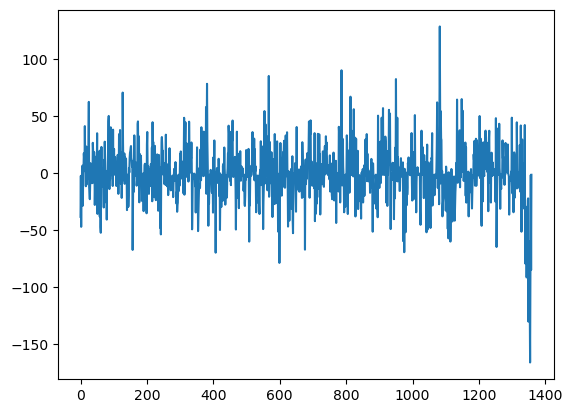

In [240]:
errors = y_test.values - y_test_pred
plt.plot(errors)


### Actual vs. Predicted (Scatter Plot) – Overfitting Check

- Points close to the line **y = x** → Excellent  
- Points scattered far from the line → Model is inaccurate


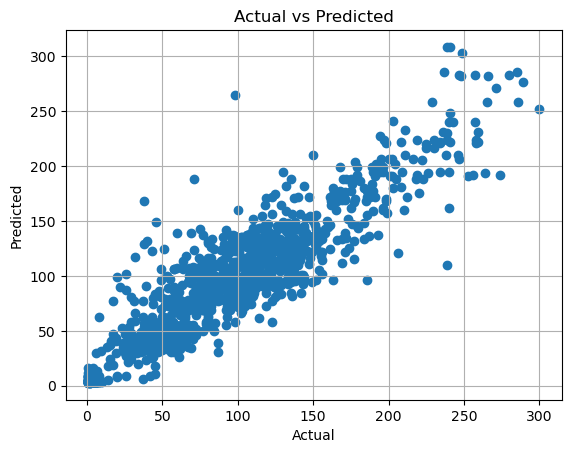

In [245]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)

Next 7-Day Demand Prediction by Department and Requirement

In [252]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import datetime

# Load the data
df = pd.read_csv('ED_full_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date
df['weekday'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Friday', 'Saturday'])

# Daily aggregation by department and requirement
daily = df.groupby(['date', 'department', 'requirement', 'weekday', 'is_weekend'])\
          .size().reset_index(name='request_count')
daily = daily.sort_values('date')

# Encode weekday
le_day = LabelEncoder()
daily['day_encoded'] = le_day.fit_transform(daily['weekday'])

# Initialize list of predictions
predictions = []

# Forecast for each department + requirement combination
groups = daily.groupby(['department', 'requirement'])

for (dept, req), group in groups:
    group = group.sort_values('date')
    group['lag_1'] = group['request_count'].shift(1)
    group = group.dropna()

    if len(group) < 10:
        continue  # Skip if not enough data

    # Train model
    X = group[['day_encoded', 'is_weekend', 'lag_1']]
    y = group['request_count']
    model = XGBRegressor()
    model.fit(X, y)

    # Generate 7-day forecast
    last_date = pd.to_datetime(group['date'].max())
    last_lag = group['request_count'].iloc[-1]

    for i in range(1, 8):
        next_date = last_date + datetime.timedelta(days=i)
        next_weekday = next_date.day_name()
        next_is_weekend = next_weekday in ['Friday', 'Saturday']
        next_day_encoded = le_day.transform([next_weekday])[0]

        X_new = pd.DataFrame({
            'day_encoded': [next_day_encoded],
            'is_weekend': [next_is_weekend],
            'lag_1': [last_lag]
        })

        y_pred = model.predict(X_new)[0]
        predictions.append({
            'date': next_date.date(),
            'department': dept,
            'requirement': req,
            'predicted_requests': round(y_pred)
        })

        # Update lag for next prediction
        last_lag = y_pred

# Display forecast table
pred_df = pd.DataFrame(predictions)
pred_df = pred_df.sort_values(['date', 'department', 'requirement'])
pred_df.head(30)  # Display top rows

date        department     requirement  predicted_requests
140  2024-07-05                 B  כח עזר - שונות                   4
224  2024-07-05                 C  כח עזר - שונות                   3
49   2024-07-06                 A  כח עזר - שונות                   2
77   2024-07-06                 A            צר"פ                   2
141  2024-07-06                 B  כח עזר - שונות                   2
225  2024-07-06                 C  כח עזר - שונות                   2
50   2024-07-07                 A  כח עזר - שונות                   4
78   2024-07-07                 A            צר"פ                   1
142  2024-07-07                 B  כח עזר - שונות                   2
226  2024-07-07                 C  כח עזר - שונות                   4
51   2024-07-08                 A  כח עזר - שונות                   1
79   2024-07-08                 A            צר"פ                   1
143  2024-07-08                 B  כח עזר - שונות                   2
227  2024-07-08                 C  כח עזר - שונות                   3
385  2024-07-08  מלר"ד אגף מהלכים  כח עזר - שונות                   4
52   2024-07-09                 A  כח עזר - שונות                   4
80   2024-07-09                 A            צר"פ                   3
144  2024-07-09                 B  כח עזר - שונות                   7
228  2024-07-09                 C  כח עזר - שונות                   8
386  2024-07-09  מלר"ד אגף מהלכים  כח עזר - שונות                   4
53   2024-07-10                 A  כח עזר - שונות                   2
81   2024-07-10                 A            צר"פ                   1
145  2024-07-10                 B  כח עזר - שונות                   2
229  2024-07-10                 C  כח עזר - שונות                   2
387  2024-07-10  מלר"ד אגף מהלכים  כח עזר - שונות                   4
54   2024-07-11                 A  כח עזר - שונות                   1
82   2024-07-11                 A            צר"פ                   1
146  2024-07-11                 B  כח עזר - שונות                   3
230  2024-07-11                 C  כח עזר - שונות                   2
388  2024-07-11  מלר"ד אגף מהלכים  כח עזר - שונות                   4

Weekly Forecast by Day, Hour, and Task Type

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Load and prepare the data ---
df = pd.read_csv('ED_full_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

# --- Step 2: Select top task types ---
top_tasks = df['requirement'].value_counts().head(6).index
df = df[df['requirement'].isin(top_tasks)]

# Set weekday order
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

# --- Step 3: Group by hour and weekday ---
task_load = df.groupby(['requirement', 'weekday', 'hour'], observed=False).size().reset_index(name='request_count')

# --- Step 4: Pivot table with all task types ---
pivot = task_load.pivot_table(
    index=['weekday', 'hour'],
    columns='requirement',
    values='request_count',
    fill_value=0,
    observed=False
).reset_index()

# --- Step 5: Compute total load per hour ---
pivot['total_load'] = pivot[top_tasks].sum(axis=1)

# --- Step 6: Recommended staffing (e.g., 1 staff member per 20 requests) ---
pivot['recommended_staff'] = (pivot['total_load'] / 20).apply(lambda x: max(1, round(x)))  # At least 1

# --- Step 7: Display the result table ---
pivot.head(20)

requirement weekday  hour  בדיקת אק"ג  בדיקת דם  בדיקת רופא  ניקיון تنظيف  \
0            Sunday   0.0       268.0     628.0       423.0         465.0   
1            Sunday   1.0       150.0     487.0       301.0         315.0   
2            Sunday   2.0       166.0     463.0       301.0         292.0   
3            Sunday   3.0       158.0     409.0       262.0         239.0   
4            Sunday   4.0       155.0     417.0       259.0         296.0   
5            Sunday   5.0       151.0     398.0       275.0         288.0   
6            Sunday   6.0       172.0     500.0       327.0         315.0   
7            Sunday   7.0       248.0     754.0       433.0         314.0   
8            Sunday   8.0       301.0     919.0       498.0         278.0   
9            Sunday   9.0       323.0    1066.0       633.0         358.0   
10           Sunday  10.0       319.0    1110.0       551.0         500.0   
11           Sunday  11.0       380.0    1122.0       570.0         455.0   
12           Sunday  12.0       369.0    1031.0       495.0         641.0   
13           Sunday  13.0       390.0     977.0       537.0         696.0   
14           Sunday  14.0       383.0    1011.0       604.0         678.0   
15           Sunday  15.0       352.0     927.0       505.0         573.0   
16           Sunday  16.0       320.0     931.0       539.0         496.0   
17           Sunday  17.0       316.0     932.0       506.0         506.0   
18           Sunday  18.0       346.0     938.0       527.0         549.0   
19           Sunday  19.0       335.0     957.0       537.0         495.0   

requirement  רמת דחיפות   תפוס  total_load  recommended_staff  
0                   0.0  411.0      2195.0                110  
1                   0.0  300.0      1553.0                 78  
2                   0.0  285.0      1507.0                 75  
3                   0.0  255.0      1323.0                 66  
4                   0.0  249.0      1376.0                 69  
5                   0.0  245.0      1357.0                 68  
6                   0.0  293.0      1607.0                 80  
7                   0.0  376.0      2125.0                106  
8                   0.0  431.0      2427.0                121  
9                   0.0  444.0      2824.0                141  
10                  0.0  475.0      2955.0                148  
11                  0.0  490.0      3017.0                151  
12                  0.0  427.0      2963.0                148  
13                  0.0  475.0      3075.0                154  
14                  0.0  509.0      3185.0                159  
15                  0.0  453.0      2810.0                140  
16                  0.0  442.0      2728.0                136  
17                  0.0  446.0      2706.0                135  
18                  0.0  464.0      2824.0                141  
19                  0.0  436.0      2760.0                138

Visualizing Model Results

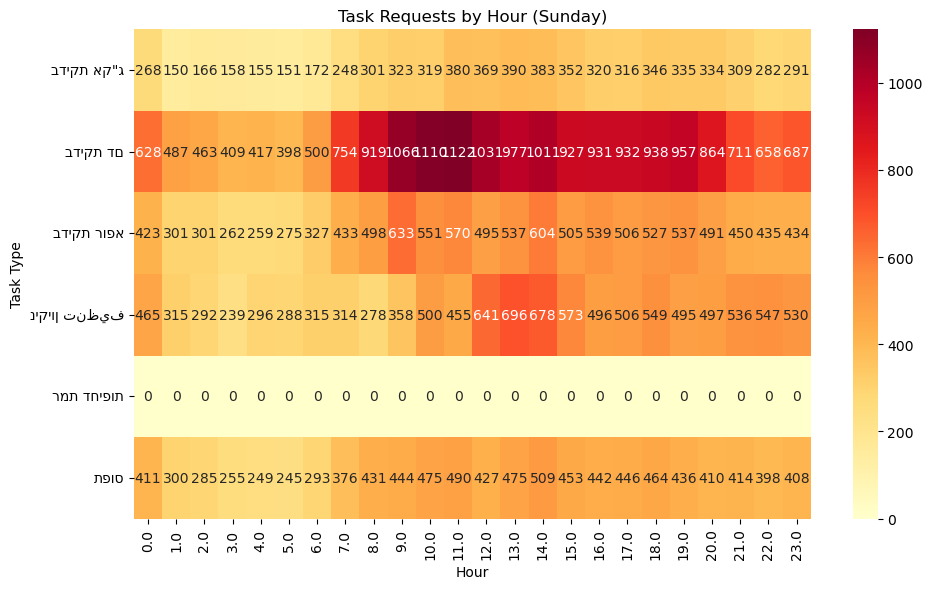

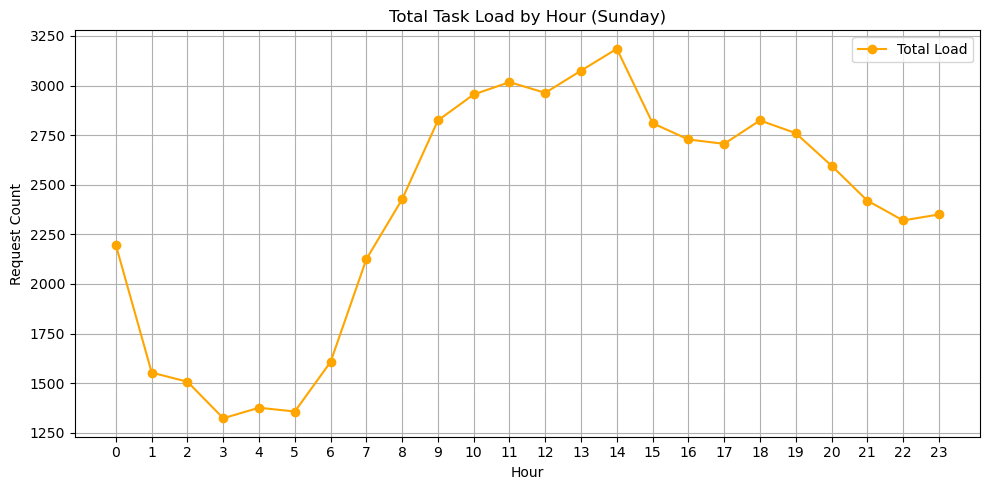

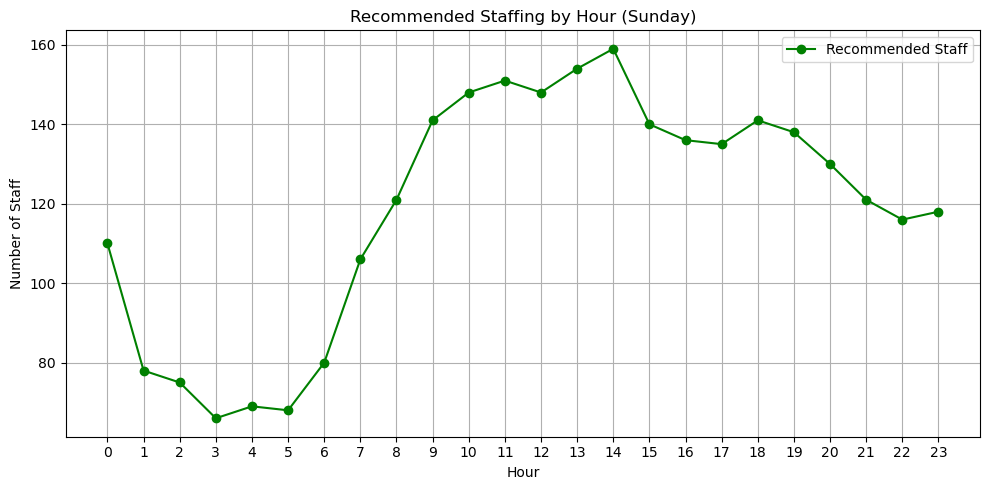

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumption: 'pivot' DataFrame already exists with columns including 'total_load' and 'recommended_staff'

# Filter for Sunday only
sunday_data = pivot[pivot['weekday'] == 'Sunday'].copy()

# Extract task types (excluding general columns)
top_tasks = [col for col in sunday_data.columns if col not in ['weekday', 'hour', 'total_load', 'recommended_staff']]

# Create summary table of requests by hour and task type
heatmap_data = sunday_data[top_tasks + ['hour']].groupby('hour').sum()

# --- Plot 1: Heatmap of Task Requests by Hour ---
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Task Requests by Hour (Sunday)')
plt.xlabel('Hour')
plt.ylabel('Task Type')
plt.tight_layout()
plt.show()

# --- Plot 2: Total Load by Hour ---
plt.figure(figsize=(10, 5))
plt.plot(sunday_data['hour'], sunday_data['total_load'], marker='o', color='orange', label='Total Load')
plt.title('Total Task Load by Hour (Sunday)')
plt.xlabel('Hour')
plt.ylabel('Request Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 3: Recommended Staffing by Hour ---
plt.figure(figsize=(10, 5))
plt.plot(sunday_data['hour'], sunday_data['recommended_staff'], marker='o', color='green', label='Recommended Staff')
plt.title('Recommended Staffing by Hour (Sunday)')
plt.xlabel('Hour')
plt.ylabel('Number of Staff')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()